<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Sigmoid_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if y_pred >= 0 else -1


                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return np.where(y_pred >= 0, 1, -1)


class LogisticRegression:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0


        y = (y + 1) / 2

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.sigmoid(linear_output)  # Sigmoid activation


                gradient = (y[i] - y_pred) * X[i]
                self.weights += self.learning_rate * gradient
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_output)
        return np.where(probabilities >= 0.5, 1, -1)



perceptron = Perceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X_train, y_train)

log_reg = LogisticRegression(learning_rate=0.1, epochs=100)
log_reg.fit(X_train, y_train)

def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')


    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(model.weights[0] * x_values + model.bias) / model.weights[1]
    plt.plot(x_values, y_values, 'k--', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(title)
    plt.show()


plot_decision_boundary(X, y, perceptron, 'Perceptron Decision Boundary')
plot_decision_boundary(X, y, log_reg, 'Logistic Regression Decision Boundary')


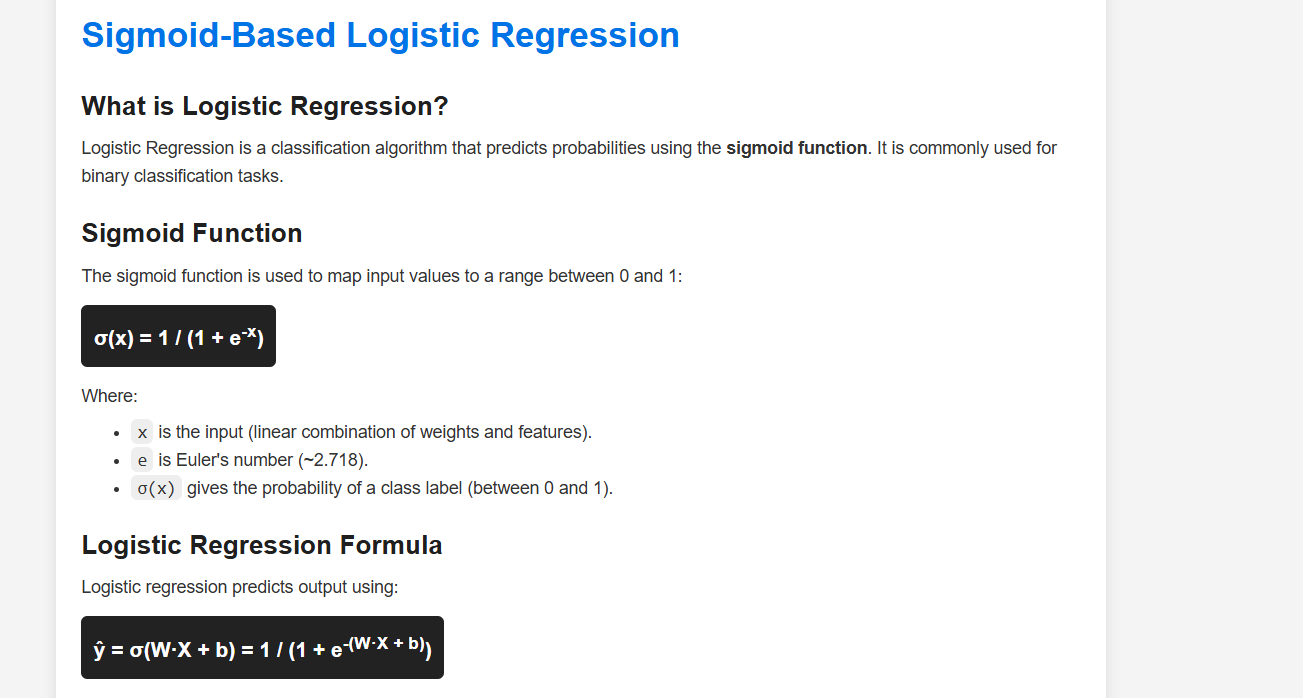

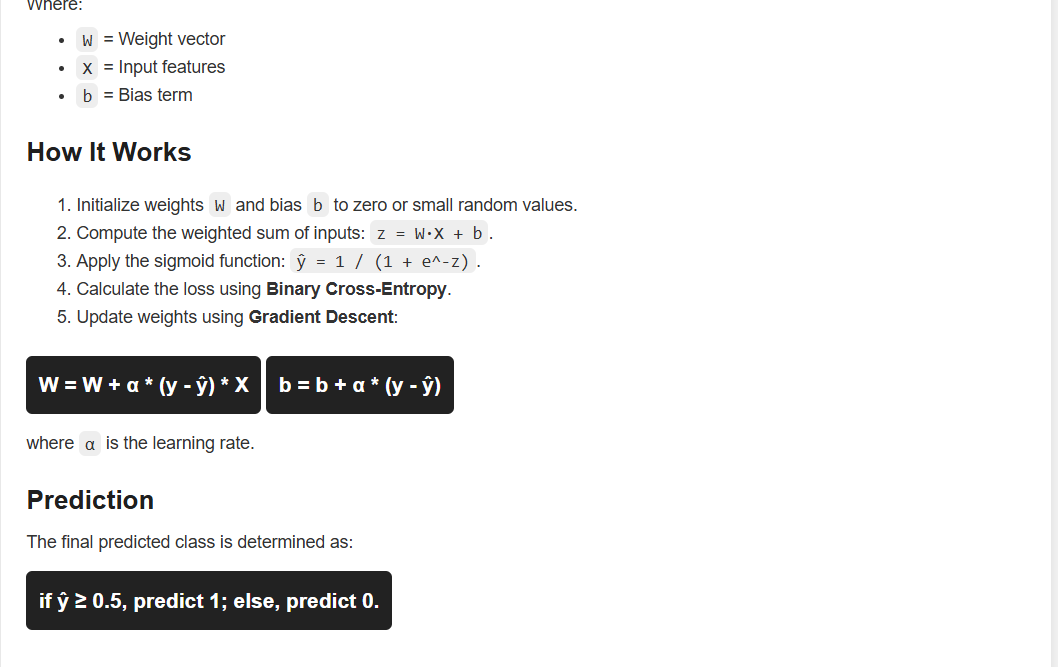